In [1]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from nltk.corpus import stopwords

In [4]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, label_binarize

In [5]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
from imblearn.over_sampling import SMOTE

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [8]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

In [10]:
df = pd.read_csv(r"C:\Users\keith\Downloads\3RDYEAR3RDSEM\accitrack_project - Copy (2)\data\combinedd.csv")
print(df.head())

  Date Reported Time Committed Weather Conditions  Barangay_Location  \
0      1/1/2016     9:25:00 PM              rainy       PADRE BURGOS   
1      1/1/2016     2:30:00 AM              clear  DIZON SUBDIVISION   
2      1/1/2016     4:30:00 AM              foggy             PINGET   
3      1/1/2016    12:30:00 PM              foggy    MINES VIEW PARK   
4      1/2/2016     6:20:00 PM              rainy   SAN LUIS VILLAGE   

      Type of Place                                       VTA Category  \
0     Parking Area   RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...   
1  Along the street  RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...   
2  Along the street  RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...   
3  Along the street  RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...   
4  Along the street  RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...   

  Victim Killed Victim Injured Victim Unharmed  \
0            No             No             Yes   
1            No       

In [11]:
df

,Date Reported,Time Committed,Weather Conditions,Barangay_Location,Type of Place,VTA Category,Victim Killed,Victim Injured,Victim Unharmed,"Main Cause (e.g. Human, Vehicle, Infrastructure, Environmental)",Details of Main Cause (e.g. Human-Intoxication),Case Status,Road Conditions,Day_Night,Traffic_Volume
0,1/1/2016,9:25:00 PM,rainy,PADRE BURGOS,Parking Area,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Inattention,SOLVED (AMICABLY SETTLED),wet,Night,80
1,1/1/2016,2:30:00 AM,clear,DIZON SUBDIVISION,Along the street,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Illegal Overtaking,SOLVED (AMICABLY SETTLED),dry,Day,48
2,1/1/2016,4:30:00 AM,foggy,PINGET,Along the street,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Environmental,Erosion of Roadside,SOLVED (AMICABLY SETTLED),damp,Day,765
3,1/1/2016,12:30:00 PM,foggy,MINES VIEW PARK,Along the street,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Illegal Overtaking,SOLVED (AMICABLY SETTLED),damp,Night,725
4,1/2/2016,6:20:00 PM,rainy,SAN LUIS VILLAGE,Along the street,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Speeding,SOLVED (AMICABLY SETTLED),wet,Night,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10591,12/30/2024,3:40:00 PM,rainy,SESSION GOV. PACK,Along the street,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Environmental,Slippery Road due to Rain,SOLVED (AMICABLY SETTLED),wet,Night,761
10592,12/30/2024,10:30:00 PM,foggy,SESSION GOV. PACK,Along the street,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Inattention,SOLVED (AMICABLY SETTLED),damp,Night,799
10593,12/29/2024,5:45:00 PM,clear,PACDAL,Along the street,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Inattention,SOLVED (AMICABLY SETTLED),dry,Night,334
10594,12/29/2024,5:55:00 PM,clear,CAMP 7,Along the street,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Speeding,SOLVED (AMICABLY SETTLED),dry,Night,409


# Parameters Explanations

ID: Thisis a unique identifier of the accident record.

Source: Indicates source of the accident report (i.e. the API which reported the accident.).

TMC: A traffic accident may have a Traffic Message Channel (TMC) code which provides more detailed description of the event.

Severity: Shows the severity of the accident, a number between 1 and 4, where 
    1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 
    4 indicates a significant impact on traffic (i.e., long delay).
    
Start_Time: Shows start time of the accident in local time zone.

End_Time: Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow was dismissed.

Start_Lat: Shows latitude in GPS coordinate of the start point.

Start_Lng: Shows longitude in GPS coordinate of the start point.

End_Lat: Shows latitude in GPS coordinate of the end point.

End_Lng: Shows longitude in GPS coordinate of the end point.

Distance(mi): The length of the road extent affected by the accident.

Description: Shows natural language description of the accident.

Number: Shows the street number in address field.

Street: Shows the street name in address field.

Side: Shows the relative side of the street (Right/Left) in address field.

City: Shows the city in address field.

County: Shows the county in address field.

State: Shows the state in address field.

Zipcode: Shows the zipcode in address field.

Country: Shows the country in address field.

Timezone: Shows timezone based on the location of the accident (eastern, central, etc.).

Airport_Code: Denotes an airport-based weather station which is the closest one to location of the accident.

Weather_Timestamp: Shows the time-stamp of weather observation record (in local time).

Temperature(F): Shows the temperature (in Fahrenheit).

Wind_Chill(F): Shows the wind chill (in Fahrenheit).

Humidity(%): Shows the humidity (in percentage).

Pressure(in): Shows the air pressure (in inches).

Visibility(mi): Shows visibility (in miles).

Wind_Direction: Shows wind direction.

Wind_Speed(mph): Shows wind speed (in miles per hour).

Precipitation(in): Shows precipitation amount in inches, if there is any.

Weather_Condition: Shows the weather condition (rain, snow, thunderstorm, fog, etc.)

Amenity: A POI annotation which indicates presence of amenity in a nearby location.

Bump: A POI annotation which indicates presence of speed bump or hump in a nearby location.

Crossing: A POI annotation which indicates presence of crossing in a nearby location.

Give_Way: A POI annotation which indicates presence of give_way in a nearby location.

Junction: A POI annotation which indicates presence of junction in a nearby location.

No_Exit: A POI annotation which indicates presence of no_exit in a nearby location.

Railway: A POI annotation which indicates presence of railway in a nearby location.

Roundabout: A POI annotation which indicates presence of roundabout in a nearby location.

Station: A POI annotation which indicates presence of station in a nearby location.

Stop: A POI annotation which indicates presence of stop in a nearby location.

Traffic_Calming: A POI annotation which indicates presence of traffic_calming in a nearby location.

Traffic_Signal: A POI annotation which indicates presence of traffic_signal in a nearby location.

Turning_Loop: A POI annotation which indicates presence of turning_loop in a nearby location.

Sunrise_Sunse: Shows the period of day (i.e. day or night) based on sunrise/sunset.

Civil_Twilight: Shows the period of day (i.e. day or night) based on civil twilight.

Nautical_Twilight: Shows the period of day (i.e. day or night) based on nautical twilight.

Astronomical_Twilight: Shows the period of day (i.e. day or night) based on astronomical twilight.

# Most frequent words in the description of an accident with severity 4

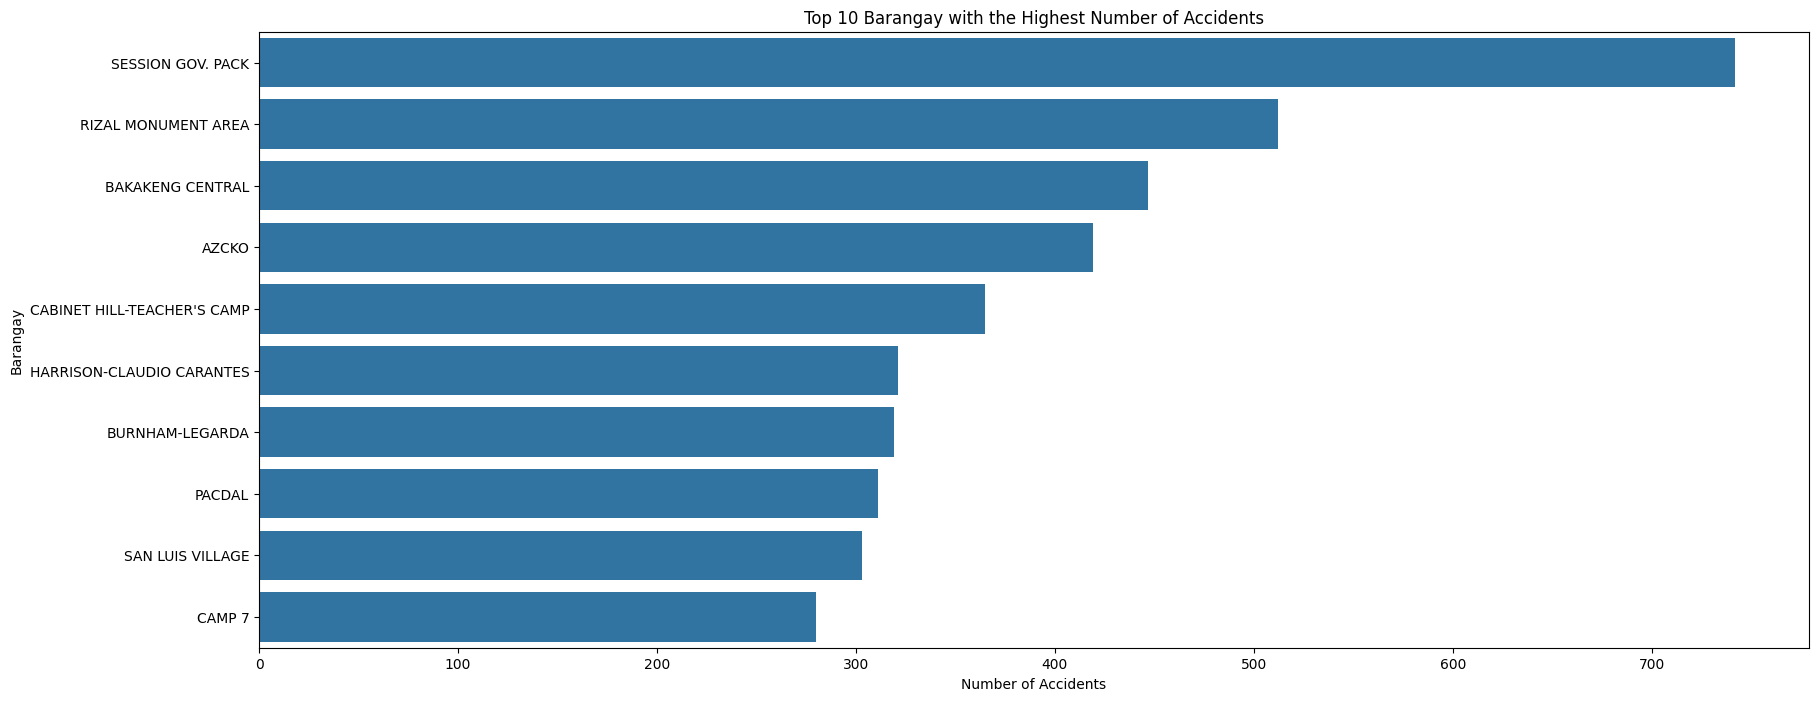

In [12]:
plt.figure(figsize=(20, 8))
plt.title("Top 10 Barangay with the Highest Number of Accidents")

# Get the counts for the top 10 barangays
state_counts = df["Barangay_Location"].value_counts()

# Create the bar plot
sns.barplot(x=state_counts[:10].values, y=state_counts[:10].index, orient="h")

# Set labels
plt.xlabel("Number of Accidents")
plt.ylabel("Barangay")

# Show the plot
plt.show()

We are going to compute the most frequent words in the description column of the accidents with a value of severity equal to 4, using some stopwords from the english language.

# Most frequent weather features

We are going to analyze which are the most frequent road features in accidents.

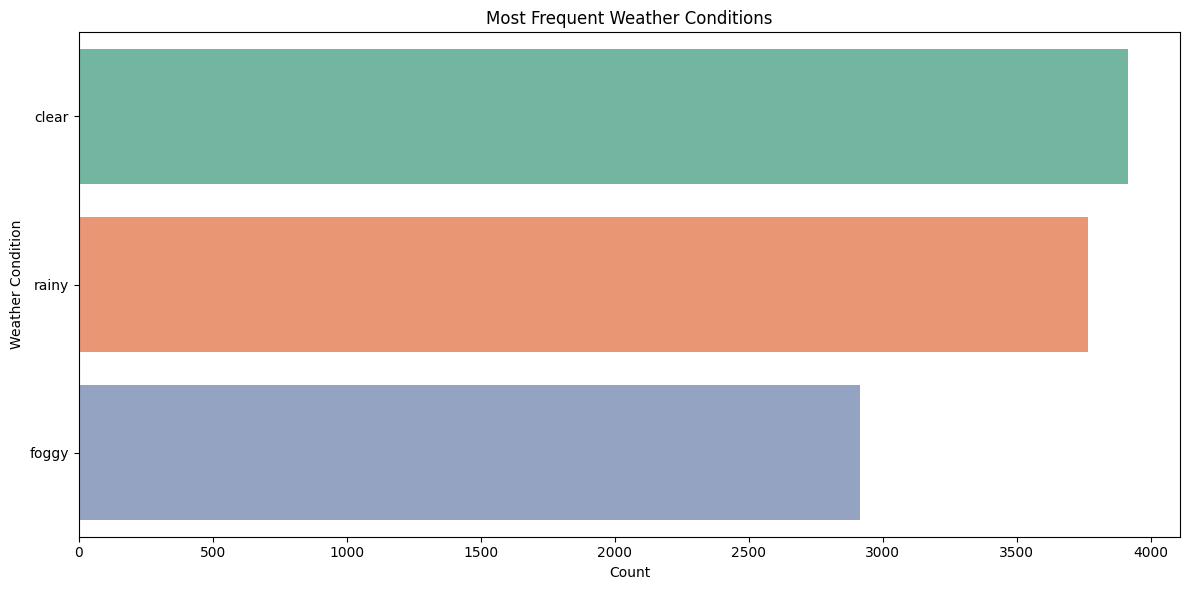

In [14]:
# Count occurrences of each weather condition
data = df["Weather Conditions"].value_counts().reset_index()
data.columns = ['Weather Conditions', 'Count']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Weather Conditions', data=data, orient='h', palette="Set2")
plt.title("Most Frequent Weather Conditions")
plt.xlabel("Count")
plt.ylabel("Weather Condition")
plt.tight_layout()
plt.show()

As we can see, most of the accidents occured near a traffic signal, expecially where a junction or a crossing was present.

The fourth most common road feature, instead, was the presence of a nearby station, probably because of the high presence of vehicles.

# Weather condition histogram

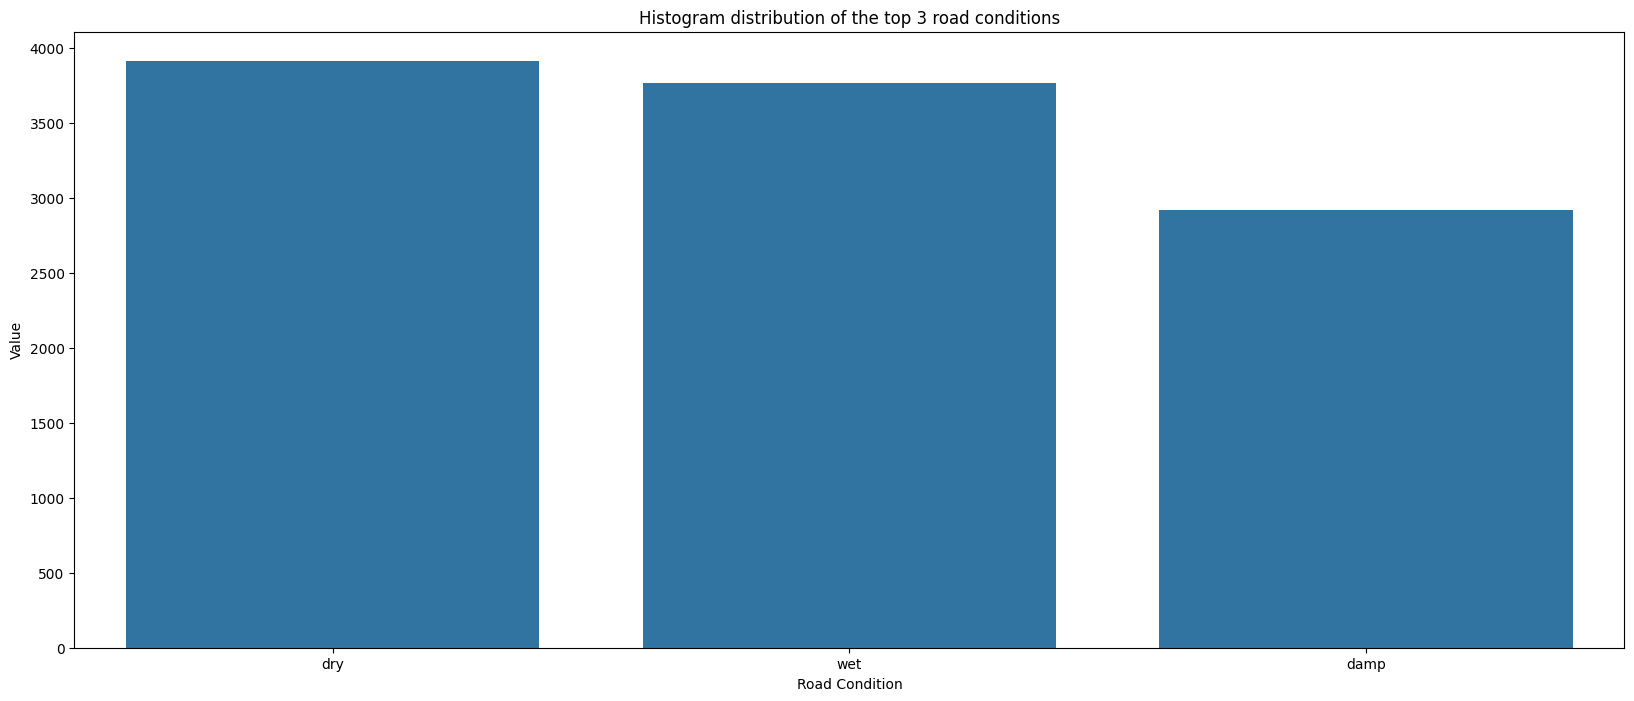

In [15]:
counts = df["Road Conditions"].value_counts()[:3]

plt.figure(figsize=(20, 8))
plt.title("Histogram distribution of the top 3 road conditions")  # Also fixed the title
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel("Road Condition")
plt.ylabel("Value")
plt.show()


In most frequent cases the weather condition is clear.

# Number of accidents for weekday

Unparsable dates: 0


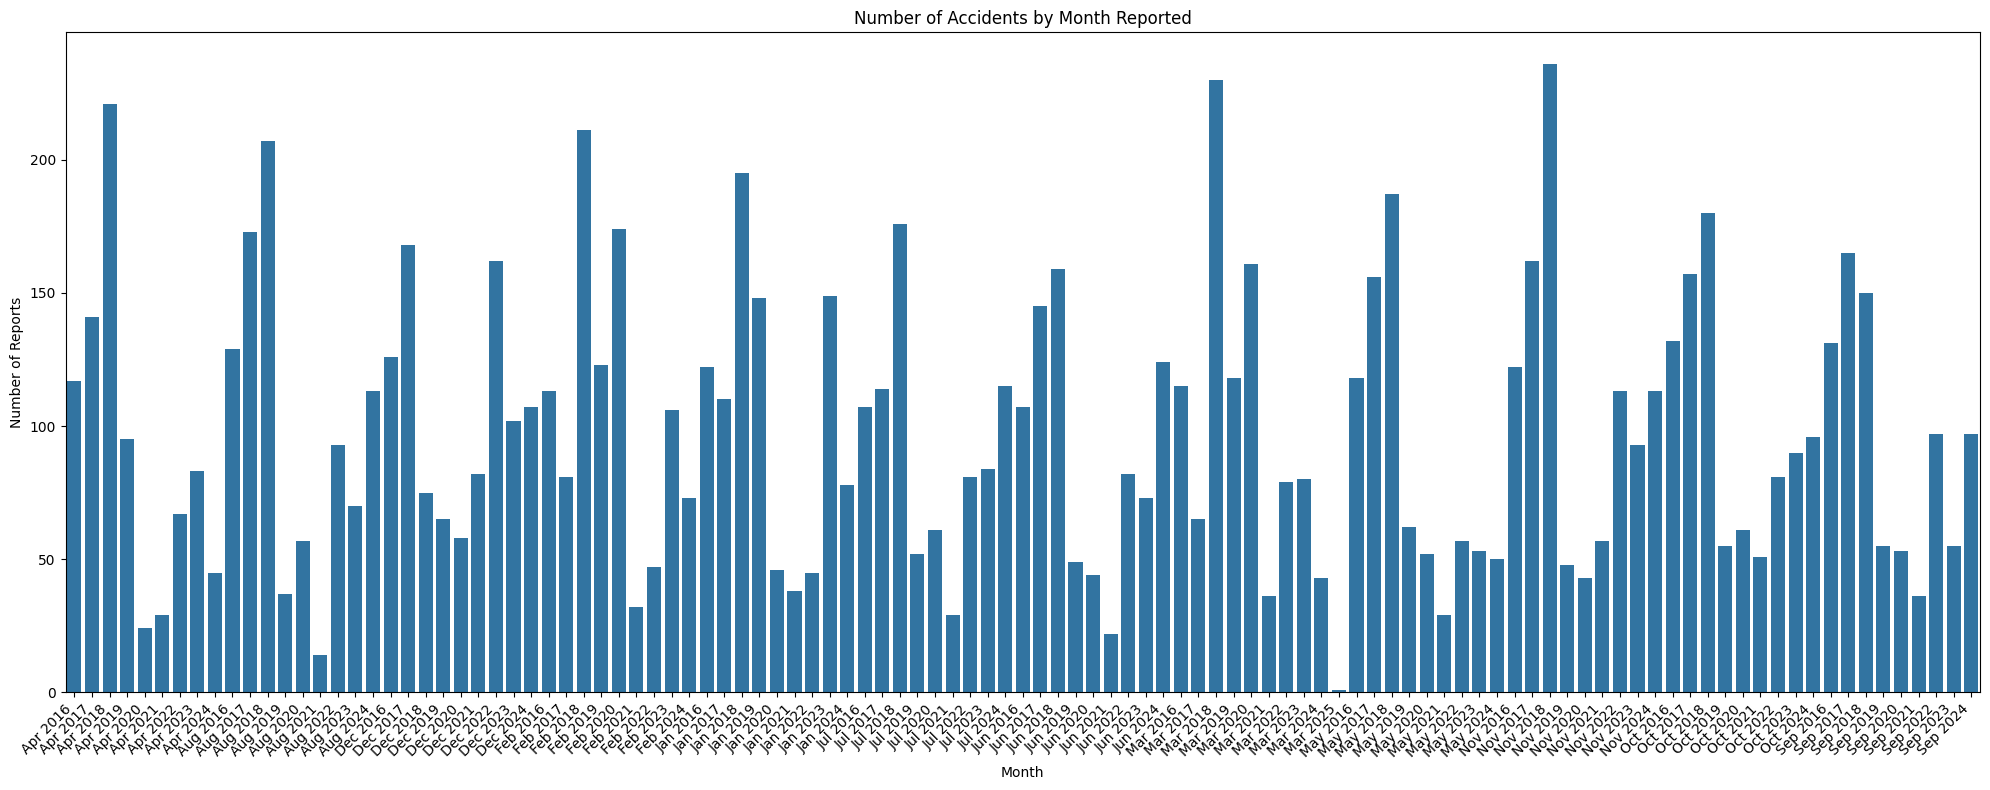

In [16]:
# Step 1: Convert to datetime (handle errors)
df['Date Reported'] = pd.to_datetime(df['Date Reported'], errors='coerce')

# Optional: Check how many couldn't be converted
print("Unparsable dates:", df['Date Reported'].isna().sum())

# Optional: Drop rows where date parsing failed
df = df.dropna(subset=['Date Reported'])

# Step 2: Create a simplified month-year column like 'Jan 2016'
df['Month_Reported'] = df['Date Reported'].dt.strftime('%b %Y')

# Step 3: Count occurrences by month
counts = df['Month_Reported'].value_counts().sort_index()

# Step 4: Plot
plt.figure(figsize=(20, 8))
plt.title("Number of Accidents by Month Reported")
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel("Month")
plt.ylabel("Number of Reports")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

As we can see from the plot above, the days with the most accidents are working days, while in the weekend we have a frequency of at least 2/3 less. This may be due to the fact that during the weekend there are fewer cars on the road.

# Droping unwanted features

We are going to drop the following features:

ID, Source: since they dont carry any information for the severity

TMC: because it could already contains information about the accident severity

Start_Time: because it was decomposed by the time features added before (day, month, weekday)

End_Time: beause we cannot know in advance when the traffic flow will become regular again

Start_Lat, Start_Lng, End_Lat, End_Lng: beause we cannot know latitude and longitude 

Description: most description only report the name of the road of the accident, and so we decided to omit this feature

Number, Street, County, State, Zipcode, Country: because we just focus on the City where the accident happened

Timezone, Airport_Code, Weather_Timestamp, Wind_Chill(F): because they are not useful for our task

Turning_Loop: since its always false

Sunrise_Sunset, Nautical_Twilight, Astronomical_Twilight: because they are redundant

Amenity,Bump, Crossing, Give_Way, Junction, No_Exit, Railway, Roundabout, Station, Stop, Traffic_Calming, Traffic_Signal: because most of the values are false.

In [17]:
features = ["Type of Place", "Case Status"]
df = df.drop(features, axis=1)

In [18]:
df

,Date Reported,Time Committed,Weather Conditions,Barangay_Location,VTA Category,Victim Killed,Victim Injured,Victim Unharmed,"Main Cause (e.g. Human, Vehicle, Infrastructure, Environmental)",Details of Main Cause (e.g. Human-Intoxication),Road Conditions,Day_Night,Traffic_Volume,Month_Reported
0,2016-01-01,9:25:00 PM,rainy,PADRE BURGOS,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Inattention,wet,Night,80,Jan 2016
1,2016-01-01,2:30:00 AM,clear,DIZON SUBDIVISION,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Illegal Overtaking,dry,Day,48,Jan 2016
2,2016-01-01,4:30:00 AM,foggy,PINGET,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Environmental,Erosion of Roadside,damp,Day,765,Jan 2016
3,2016-01-01,12:30:00 PM,foggy,MINES VIEW PARK,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Illegal Overtaking,damp,Night,725,Jan 2016
4,2016-01-02,6:20:00 PM,rainy,SAN LUIS VILLAGE,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Speeding,wet,Night,1000,Jan 2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10591,2024-12-30,3:40:00 PM,rainy,SESSION GOV. PACK,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Environmental,Slippery Road due to Rain,wet,Night,761,Dec 2024
10592,2024-12-30,10:30:00 PM,foggy,SESSION GOV. PACK,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Inattention,damp,Night,799,Dec 2024
10593,2024-12-29,5:45:00 PM,clear,PACDAL,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Inattention,dry,Night,334,Dec 2024
10594,2024-12-29,5:55:00 PM,clear,CAMP 7,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Speeding,dry,Night,409,Dec 2024


# Drop duplicates

We are going to check if there are some duplicates in the dataset.

In [19]:
print("Number of rows:", len(df.index))
df.drop_duplicates(inplace=True)
print("Number of rows after drop of duplicates:", len(df.index))

Number of rows: 10596
Number of rows after drop of duplicates: 10596


# Correlation

# Label Encoding

In [20]:
df.columns

Index(['Date Reported', 'Time Committed', 'Weather Conditions',
       'Barangay_Location', 'VTA Category', 'Victim Killed', 'Victim Injured',
       'Victim Unharmed',
       'Main Cause (e.g. Human, Vehicle, Infrastructure, Environmental)',
       'Details of Main Cause (e.g.  Human-Intoxication)', 'Road Conditions',
       'Day_Night', 'Traffic_Volume', 'Month_Reported'],
      dtype='object')

In [21]:
l=LabelEncoder()

In [22]:
x = df.copy()  
x_encoded = x.copy()

for col in x_encoded.columns:
    if x_encoded[col].dtype == 'object':
        x_encoded[col] = LabelEncoder().fit_transform(x_encoded[col])

In [23]:
v=l.fit_transform(df["Traffic_Volume"])
b=l.fit_transform(df["Barangay_Location"])
r=l.fit_transform(df["Road Conditions"])
w=l.fit_transform(df["Weather Conditions"])
d=l.fit_transform(df["Date Reported"])

In [24]:
df["Traffic_Volume"]=v

In [25]:
df["Barangay_Location"]=b

In [26]:
df["Road Conditions"]=r

In [27]:
df["Weather Conditions"]=w

In [28]:
df["Date Reported"]=d

In [29]:
df

,Date Reported,Time Committed,Weather Conditions,Barangay_Location,VTA Category,Victim Killed,Victim Injured,Victim Unharmed,"Main Cause (e.g. Human, Vehicle, Infrastructure, Environmental)",Details of Main Cause (e.g. Human-Intoxication),Road Conditions,Day_Night,Traffic_Volume,Month_Reported
0,0,9:25:00 PM,2,88,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Inattention,2,Night,80,Jan 2016
1,0,2:30:00 AM,0,32,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Illegal Overtaking,1,Day,48,Jan 2016
2,0,4:30:00 AM,1,92,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Environmental,Erosion of Roadside,0,Day,765,Jan 2016
3,0,12:30:00 PM,1,79,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Illegal Overtaking,0,Night,725,Jan 2016
4,1,6:20:00 PM,2,106,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Speeding,2,Night,1000,Jan 2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10591,2808,3:40:00 PM,2,114,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Environmental,Slippery Road due to Rain,2,Night,761,Dec 2024
10592,2808,10:30:00 PM,1,114,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Inattention,0,Night,799,Dec 2024
10593,2807,5:45:00 PM,0,87,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Inattention,1,Night,334,Dec 2024
10594,2807,5:55:00 PM,0,22,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Speeding,1,Night,409,Dec 2024


In [30]:
x = df.iloc[:500000,1:]
y = df.iloc[:500000,:1]

In [31]:
x

,Time Committed,Weather Conditions,Barangay_Location,VTA Category,Victim Killed,Victim Injured,Victim Unharmed,"Main Cause (e.g. Human, Vehicle, Infrastructure, Environmental)",Details of Main Cause (e.g. Human-Intoxication),Road Conditions,Day_Night,Traffic_Volume,Month_Reported
0,9:25:00 PM,2,88,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Inattention,2,Night,80,Jan 2016
1,2:30:00 AM,0,32,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Illegal Overtaking,1,Day,48,Jan 2016
2,4:30:00 AM,1,92,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Environmental,Erosion of Roadside,0,Day,765,Jan 2016
3,12:30:00 PM,1,79,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Illegal Overtaking,0,Night,725,Jan 2016
4,6:20:00 PM,2,106,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Speeding,2,Night,1000,Jan 2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10591,3:40:00 PM,2,114,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Environmental,Slippery Road due to Rain,2,Night,761,Dec 2024
10592,10:30:00 PM,1,114,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Inattention,0,Night,799,Dec 2024
10593,5:45:00 PM,0,87,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Inattention,1,Night,334,Dec 2024
10594,5:55:00 PM,0,22,RECKLESS IMPRUDENCE RESULTING TO DAMAGE TO PRO...,No,No,Yes,Human Error,Speeding,1,Night,409,Dec 2024


In [32]:
y

,Date Reported
0,0
1,0
2,0
3,0
4,1
...,...
10591,2808
10592,2808
10593,2807
10594,2807


# Handle Imbalanced data

In [33]:
y["Date Reported"].value_counts(normalize=True)*100

Date Reported
1408    0.349188
1400    0.311438
1404    0.273688
1410    0.235938
1402    0.207626
          ...   
2193    0.009438
2187    0.009438
440     0.009438
436     0.009438
432     0.009438
Name: proportion, Length: 2810, dtype: float64

In [34]:
print(y.value_counts())

Date Reported
1408             37
1400             33
1404             29
1410             25
1402             22
                 ..
2788              1
2786              1
1200              1
1198              1
1196              1
Name: count, Length: 2810, dtype: int64


The severity attribute as we can see from the previous plot is highly unbalanced, the number of accident with the severity 1 is very small instead the number of accident with severity 2 is much higher.

# Train, Test data splitting

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,train_size=0.7,random_state=0)

# Scaling

In [36]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# Make a copy to avoid changing the original
x_encoded = x.copy()

# Encode categorical columns
for col in x_encoded.columns:
    if x_encoded[col].dtype == 'object':
        x_encoded[col] = LabelEncoder().fit_transform(x_encoded[col])

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.3, train_size=0.7, random_state=0)

# Scale the data
scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

# Model Building

In [37]:
accuracy = dict()

# XGBClassifier

In [39]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Load your dataset
data = pd.read_csv(r"C:\Users\keith\Downloads\3RDYEAR3RDSEM\accitrack_project - Copy (2)\data\combinedd.csv")

# Define target and features
target_column = 'Main Cause (e.g. Human, Vehicle, Infrastructure, Environmental)'
y = data[target_column]
x = data.drop(columns=[target_column, 'Date Reported', 'Time Committed', 'Barangay_Location', 'Case Status'])

# Encode categorical features
label_encoders = {}
for column in x.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    x[column] = le.fit_transform(x[column].astype(str))  # Cast to string to avoid errors
    label_encoders[column] = le

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y.astype(str))

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.3, random_state=42)

# Define and train XGBoost model
model = XGBClassifier(objective='multi:softmax', learning_rate=0.1, max_depth=5, n_estimators=100, n_jobs=-1)
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=-1, num_parallel_tree=None, ...)

In [40]:
y_pred = model.predict(x_test)

In [41]:
accuracy_score(y_test, y_pred)

0.986159169550173

In [42]:
accuracy['XBG Classifier']=accuracy_score(y_test, y_pred)

In [43]:
y_pred1 = model.predict(x_train)

In [44]:
accuracy_score(y_train, y_pred1)

0.9901577457192935

In [45]:
print(classification_report(y_train,y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2396
           1       1.00      0.97      0.99      2205
           2       0.97      1.00      0.99      2816

    accuracy                           0.99      7417
   macro avg       0.99      0.99      0.99      7417
weighted avg       0.99      0.99      0.99      7417



In [46]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Select categorical columns
categorical_cols = x_train.select_dtypes(include=['object']).columns.tolist()

# Create ColumnTransformer with OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Keep non-categorical columns
)

# Transform the training and testing sets
x_train_encoded = preprocessor.fit_transform(x_train)
x_test_encoded = preprocessor.transform(x_test)


In [47]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(x_train_encoded, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [48]:
y_pred = model.predict(x_test_encoded)

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Confusion Matrix:
 [[1016    0   11]
 [   1  887   30]
 [   1    3 1230]]


# Decision Tree

In [50]:
DT = DecisionTreeClassifier(random_state=100)
params = [{"criterion": ["gini", "entropy"], "max_depth": [5, 10, 15, 30]}]
grid1 = GridSearchCV(DT, params, n_jobs=-1)
grid1.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=100), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 10, 15, 30]}])

In [51]:
grid1.best_params_

{'criterion': 'gini', 'max_depth': 10}

In [52]:
#?DecisionTreeClassifier

In [53]:
DT1=DecisionTreeClassifier(criterion='entropy', max_depth=30)
DT1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=30)

In [54]:
y_pred4 = DT1.predict(x_train)

In [55]:
accuracy_score(y_train, y_pred4)

0.9991910475933666

In [56]:
print(classification_report(y_train, y_pred4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2396
           1       1.00      1.00      1.00      2205
           2       1.00      1.00      1.00      2816

    accuracy                           1.00      7417
   macro avg       1.00      1.00      1.00      7417
weighted avg       1.00      1.00      1.00      7417



In [57]:
y_pred5 = DT1.predict(x_test)

In [58]:
accuracy_score(y_test, y_pred5)

0.9707455174583203

In [59]:
accuracy['Decision Tree']=accuracy_score(y_test, y_pred5)

In [60]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1027
           1       0.97      0.97      0.97       918
           2       0.97      0.96      0.96      1234

    accuracy                           0.97      3179
   macro avg       0.97      0.97      0.97      3179
weighted avg       0.97      0.97      0.97      3179



# Random Forest

In [61]:
#?RandomForestClassifier

In [62]:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy',max_depth=30,n_jobs=-1)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, n_jobs=-1)

In [63]:
y_pred6 = classifier.predict(x_train)

In [64]:
accuracy_score(y_train, y_pred6)

0.9991910475933666

In [65]:
print(classification_report(y_train, y_pred6))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2396
           1       1.00      1.00      1.00      2205
           2       1.00      1.00      1.00      2816

    accuracy                           1.00      7417
   macro avg       1.00      1.00      1.00      7417
weighted avg       1.00      1.00      1.00      7417



In [66]:
y_pred7 = classifier.predict(x_test)

In [67]:
accuracy_score(y_test, y_pred7)

0.9757785467128027

In [68]:
print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1027
           1       0.97      0.97      0.97       918
           2       0.97      0.97      0.97      1234

    accuracy                           0.98      3179
   macro avg       0.98      0.98      0.98      3179
weighted avg       0.98      0.98      0.98      3179



In [69]:
accuracy['Random Forest']=accuracy_score(y_test, y_pred7)

# Accuracy

In [70]:
accuracy

{'XBG Classifier': 0.986159169550173,
 'Decision Tree': 0.9707455174583203,
 'Random Forest': 0.9757785467128027}

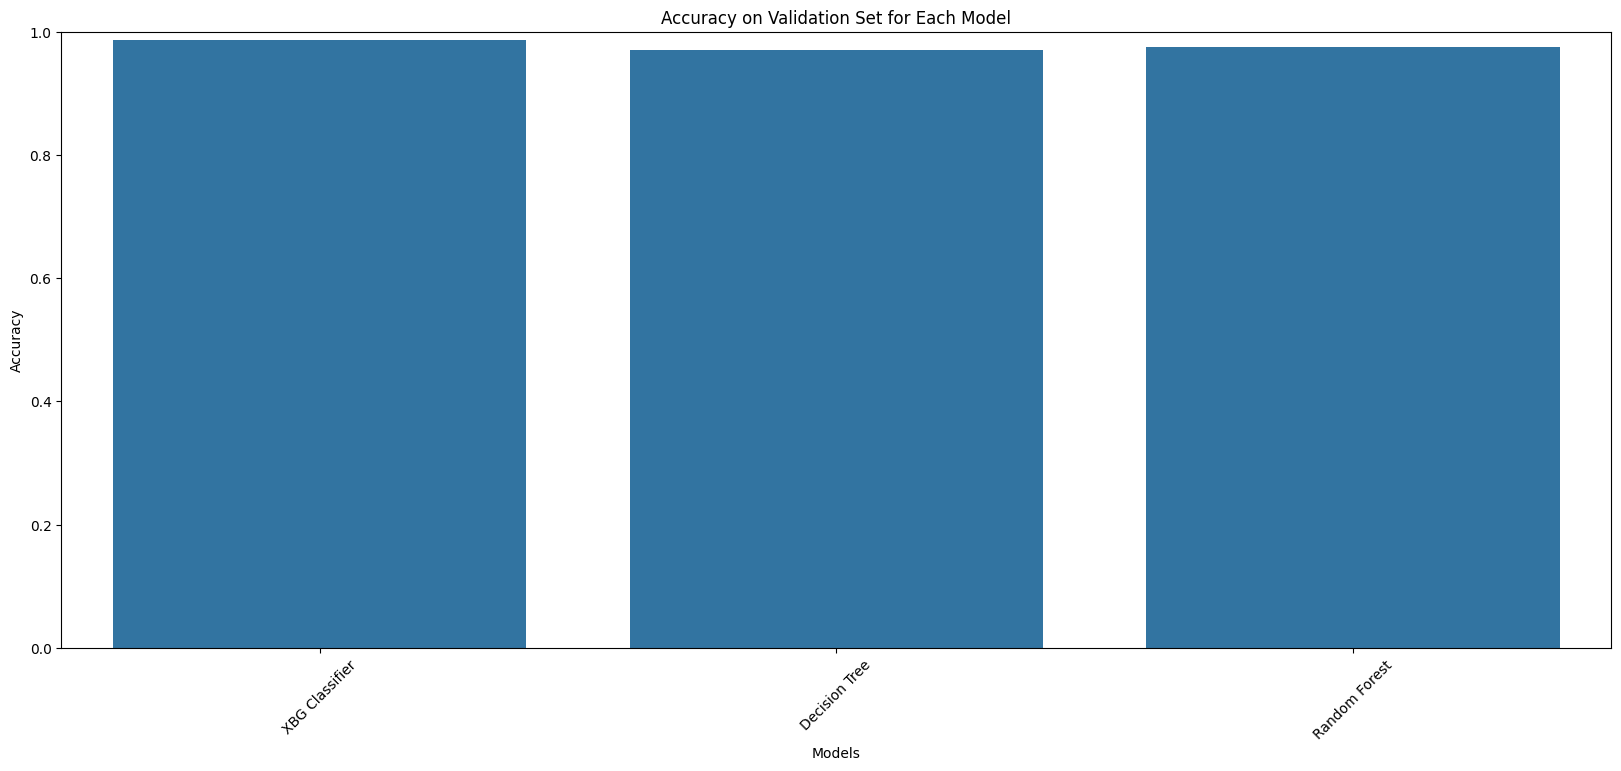

In [71]:
plt.figure(figsize=(20, 8))
plt.title("Accuracy on Validation Set for Each Model")

sns.barplot(x=list(accuracy.keys()), y=list(accuracy.values()))
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.show()

In [69]:
import joblib

# Example: save XGBoost or RandomForest model
joblib.dump(model, 'accident_prediction_model.pkl')

['accident_prediction_model.pkl']

In [ ]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# 1. Load the dataset
df = pd.read_csv(r"C:\Users\keith\Downloads\ACCITRACK_csv\Combined.csv")

df.columns = df.columns.str.strip()

# 2. Rename columns to match internal convention
df = df.rename(columns={
    'Date Reported': 'date',
    'Time Committed': 'time',
    'Weather Conditions': 'weather',
    'Barangay/Location': 'location',
    'Type of Place': 'type_of_place',
    'VTA Category': 'vta_category',
    'Victim Killed': 'victim_killed',
    'Victim Injured': 'victim_injured',
    'Victim Unharmed': 'victim_unharmed',
    'Main Cause (e.g. Human, Vehicle, Infrastructure, Environmental)': 'cause',
    'Details of Main Cause (e.g.  Human-Intoxication)': 'cause_details',
    'Case Status': 'case_status',
    'Road Conditions': 'road_conditions'
})

# 3. Clean and preprocess
df = df.dropna(subset=['weather', 'road_conditions', 'time', 'location', 'date'])

# Convert victim fields from Yes/No to 1/0
yes_no_map = {'Yes': 1, 'No': 0}
for col in ['victim_killed', 'victim_injured', 'victim_unharmed']:
    df[col] = df[col].map(yes_no_map)

# Extract hour and weekday from date/time
df['hour'] = pd.to_datetime(df['time'], errors='coerce').dt.hour.fillna(0).astype(int)
df['day_of_week'] = pd.to_datetime(df['date'], errors='coerce').dt.weekday.fillna(0).astype(int)

# Encode categorical features
label_cols = ['weather', 'road_conditions', 'location']
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le  # Save encoders if needed later

# 4. Define features and target
X = df[['weather', 'road_conditions', 'hour', 'location', 'day_of_week']]
y = df['victim_killed']  # Example target (you can change to injured/unharmed/etc.)

# 5. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# 7. Evaluate model
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {acc:.2f}")

# 8. Save model
joblib.dump(model, "accident_prediction_model.pkl")
print("✅ Model saved as accident_prediction_model.pkl")


✅ Model Accuracy: 1.00
✅ Model saved as accident_prediction_model.pkl
